In [1]:
import numpy as np 
import pandas as pd 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("/kaggle/input/chrunn/customer_churn_large_dataset.xlsx")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [9]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [10]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


Feature Engineering

In [11]:
data['Monthly_usage'] = data['Total_Usage_GB'] / data['Subscription_Length_Months']

In [12]:
data['Total_amount_paid'] = data['Subscription_Length_Months'] * data['Monthly_Bill']

EDA

In [13]:
loyal_cus = data[data['Churn'] == 0]

In [14]:
Unloyal_cus = data[data['Churn'] == 1]

In [15]:
loyal_cus['Age'].mean()

44.00330539017543

In [16]:
Unloyal_cus['Age'].mean()

44.05094517768537

In [17]:
loyal_cus['Monthly_usage'].mean()

43.32066424115284

In [18]:
Unloyal_cus['Monthly_usage'].mean()

43.378957202518215

In [19]:
loyal_cus['Total_amount_paid'].max()

2399.52

In [20]:
Unloyal_cus['Total_amount_paid'].max()

2398.8

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


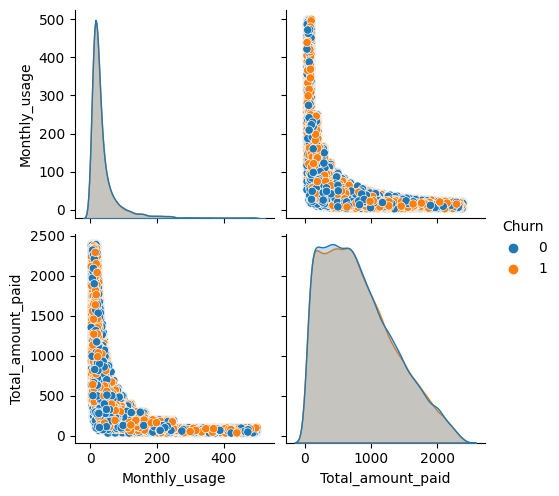

In [21]:
sns.pairplot(data[['Monthly_usage', 'Total_amount_paid','Churn']],hue='Churn')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


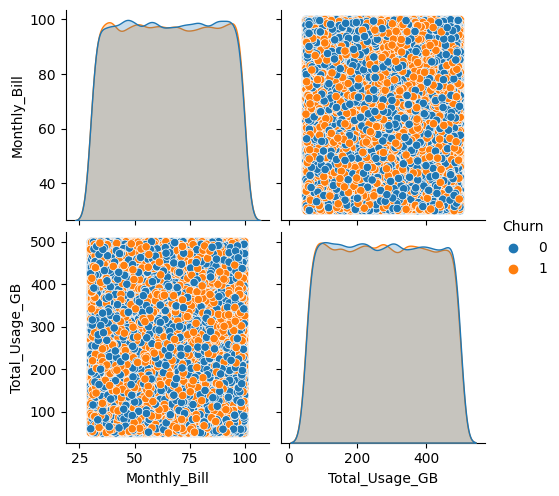

In [22]:
sns.pairplot(data[['Monthly_Bill', 'Total_Usage_GB','Churn']],hue='Churn')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


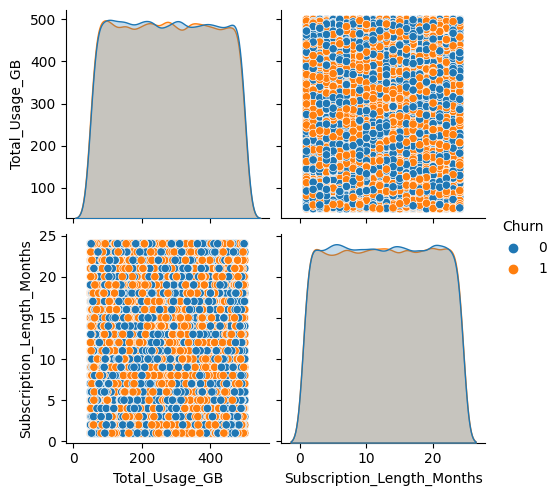

In [23]:
sns.pairplot(data[['Total_Usage_GB', 'Subscription_Length_Months','Churn']],hue='Churn')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


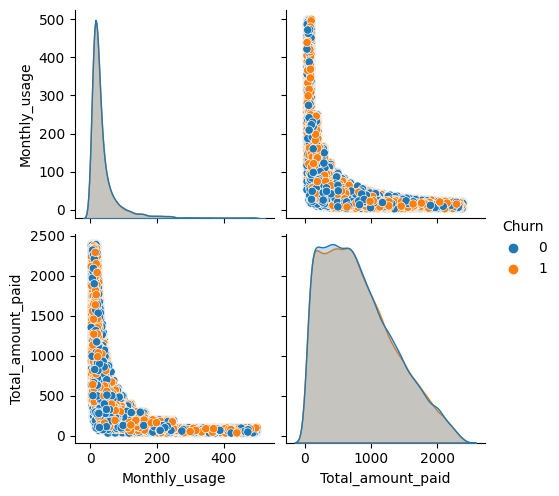

In [24]:
sns.pairplot(data[['Monthly_usage', 'Total_amount_paid','Churn']],hue='Churn')

In [25]:
final_data = data.drop(['CustomerID','Name','Age','Gender','Location'],axis=1)
final_data

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Monthly_usage,Total_amount_paid
0,17,73.36,236,0,13.882353,1247.12
1,1,48.76,172,0,172.000000,48.76
2,5,85.47,460,0,92.000000,427.35
3,3,97.94,297,1,99.000000,293.82
4,19,58.14,266,0,14.000000,1104.66
...,...,...,...,...,...,...
99995,23,55.13,226,1,9.826087,1267.99
99996,19,61.65,351,0,18.473684,1171.35
99997,17,96.11,251,1,14.764706,1633.87
99998,20,49.25,434,1,21.700000,985.00


In [26]:
x = final_data.drop(['Churn'],axis=1)
y = final_data['Churn']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
X_train

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Monthly_usage,Total_amount_paid
78689,17,98.37,367,21.588235,1672.29
76423,22,77.27,488,22.181818,1699.94
86945,5,92.77,435,87.000000,463.85
57427,2,63.45,315,157.500000,126.90
34616,23,65.85,466,20.260870,1514.55
...,...,...,...,...,...
50057,8,58.76,288,36.000000,470.08
98047,11,77.71,244,22.181818,854.81
5192,22,62.49,73,3.318182,1374.78
77708,6,87.78,318,53.000000,526.68


In [35]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [36]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score


Non - Linear Neural Network

In [37]:
model = Sequential()

# Input layer
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=256, activation='tanh'))
model.add(Dropout(0.3))  
model.add(Dense(units=128, activation='tanh'))
model.add(Dropout(0.3))

# Output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)



Epoch 1/20
125/125 [==============================] - 1s 4ms/step - loss: 0.5494 - accuracy: 0.7717
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.7820
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7885
Epoch 4/20
125/125 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.7918
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7946
Epoch 6/20
125/125 [==============================] - 0s 4ms/step - loss: 0.5132 - accuracy: 0.7949
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.7956
Epoch 8/20
125/125 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7959
Epoch 9/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7960
Epoch 10/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7960

In [38]:
X_test = X_test.astype(np.float32)

In [50]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

63/63 [==============================] - 0s 1ms/step


Evaluation

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [56]:
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.7975

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8545

In [53]:
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred1)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.6770
Recall: 0.5383
F1 Score: 0.5997


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8705

In [54]:
precision = precision_score(y_test, y_pred2)

# Calculate recall
recall = recall_score(y_test, y_pred2)

# Calculate F1 score
f1 = f1_score(y_test, y_pred2)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.7385
Recall: 0.5160
F1 Score: 0.6076


In [44]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)